In [2]:
from nltk.tokenize import word_tokenize
import nltk

In [2]:
sagan_quote = """
... If you wish to make an apple pie from scratch,
... you must first invent the universe."""

In [5]:
# tokenize words and create pos tags
words_in_quote = word_tokenize(sagan_quote)
print(words_in_quote)

['If', 'you', 'wish', 'to', 'make', 'an', 'apple', 'pie', 'from', 'scratch', ',', 'you', 'must', 'first', 'invent', 'the', 'universe', '.']


In [10]:
nltk.download('averaged_perceptron_tagger')
pos_tags = nltk.pos_tag(words_in_quote)
print(pos_tags)

[('If', 'IN'), ('you', 'PRP'), ('wish', 'VBP'), ('to', 'TO'), ('make', 'VB'), ('an', 'DT'), ('apple', 'NN'), ('pie', 'NN'), ('from', 'IN'), ('scratch', 'NN'), (',', ','), ('you', 'PRP'), ('must', 'MD'), ('first', 'VB'), ('invent', 'VB'), ('the', 'DT'), ('universe', 'NN'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jandogonzales/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:
# list of tags and corresponding meanings
nltk.download('tagsets')
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to
[nltk_data]     /home/jandogonzales/nltk_data...


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data]   Unzipping help/tagsets.zip.


In [16]:
# tagging nonsense to get the context of a sentence
jabberwocky_excerpt = """
... 'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
... all mimsy were the borogoves, and the mome raths outgrabe."""
words_in_jab = word_tokenize(jabberwocky_excerpt)
jab_pos = nltk.pos_tag(words_in_jab)
print(len(words_in_jab))
print(jab_pos)

30
[('...', ':'), ("'T", 'NN'), ('was', 'VBD'), ('brillig', 'VBN'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('slithy', 'JJ'), ('toves', 'NNS'), ('did', 'VBD'), ('gyre', 'NN'), ('and', 'CC'), ('gimble', 'JJ'), ('in', 'IN'), ('the', 'DT'), ('wabe', 'NN'), (':', ':'), ('...', ':'), ('all', 'DT'), ('mimsy', 'NNS'), ('were', 'VBD'), ('the', 'DT'), ('borogoves', 'NNS'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('mome', 'JJ'), ('raths', 'NNS'), ('outgrabe', 'RB'), ('.', '.')]


In [17]:
# Lemmatizing creating lemma root words from list of words
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("scarves")

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jandogonzales/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'scarf'

In [18]:
# lemmatize a string of words
string_for_lemmatizing = "The friends of DeSoto love scarves."
words = word_tokenize(string_for_lemmatizing)
lem_words = [lemmatizer.lemmatize(word) for word in words]
print(lem_words)

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']


In [19]:
# if lemma does not match the given word??
lemmatizer.lemmatize("worst")

# default lemmatizer is the noun but you can switch to adj
lemmatizer.lemmatize("worst", pos="a")

'bad'

In [20]:
# chunking allows you to id phrases (ie noun phrases)
# chunking allows use of POS tags to group words and apply chunk tags
# to those groups.
# NOTE: Chunks don't overlap so instance of word can only be in 
# one chunk at a time 
from nltk.tokenize import word_tokenize
lotr_quote = "It's a dangerous business, Frodo, going out your door."
words_lotr = word_tokenize(lotr_quote)
pos_lotr = nltk.pos_tag(words_lotr)
print(words_lotr)
print(pos_lotr)

['It', "'s", 'a', 'dangerous', 'business', ',', 'Frodo', ',', 'going', 'out', 'your', 'door', '.']
[('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT'), ('dangerous', 'JJ'), ('business', 'NN'), (',', ','), ('Frodo', 'NNP'), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), ('door', 'NN'), ('.', '.')]


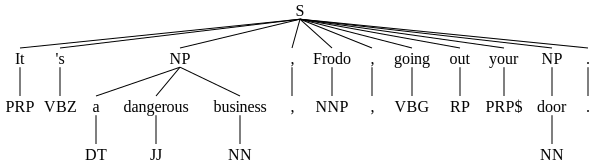

In [21]:
# chunking requires chunk grammar 
# combo of rules on how sentences should be chunked. REGEXES
# NP - noun phrases chunking
# 1. Optional (?) determiner ('DT')
# 2. Any number (*) of adjectives ('JJ')
# 3. End with a noun (NN)
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunk_parser = nltk.RegexpParser(grammar)
tree = chunk_parser.parse(pos_lotr)
tree

# draws the tree of possible noun phrase chunks
# 1. 'a dangerous business' has a determiner, an adj and a noun
# 2. 'door' is just a noun

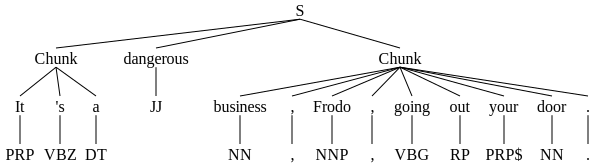

In [22]:
# Chinking - opposite of chunking since it excludes
# 1. Include everything for chunking "<.*>+"
# 2. Exclude adjectives for chinking "}<JJ>{"
grammar = """
Chunk: {<.*>+}
}<JJ>{
"""
chunk_parser = nltk.RegexpParser(grammar)
tree = chunk_parser.parse(pos_lotr)
tree

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/jandogonzales/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /home/jandogonzales/nltk_data...
[nltk_data]   Package words is already up-to-date!


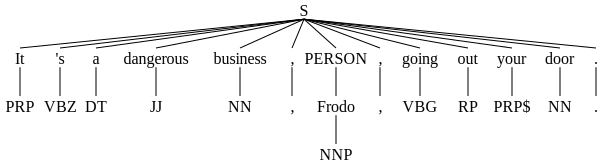

In [23]:
# Named Entity Recognition (NER) - noun phrases that refer to specific locations, people, organizations,etc.
nltk.download("maxent_ne_chunker")
nltk.download("words")
tree = nltk.ne_chunk(pos_lotr)
tree

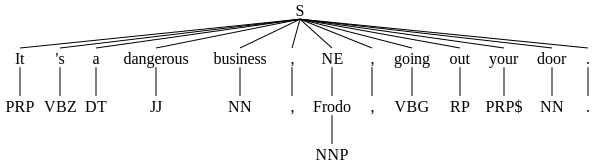

In [24]:
# View what the NE (named entities) are but not type
tree = nltk.ne_chunk(pos_lotr, binary=True)
tree

In [25]:
# extract named entities directly from your text
quote = """
... Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
... for countless centuries Mars has been the star of war—but failed to
... interpret the fluctuating appearances of the markings they mapped so well.
... All that time the Martians must have been getting ready.
...
... During the opposition of 1894 a great light was seen on the illuminated
... part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
... and then by other observers. English readers heard of it first in the
... issue of Nature dated August 2."""

In [75]:
# create a function to extract named entities
def extract_ne(quote):
    words = word_tokenize(quote, language='english')
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    for t in tree:
        #if hasattr(t, "label") and t.label() == "NE":
        if hasattr(t, "label"):
            print(t)
            for i in t:
                print(i[0])
            print('\n')
            #x = " ".join(i[0] for i in t)
            #print(x)
    
    return (tree, set(
        " ".join(i[0] for i in t)
        for t in tree
        if hasattr(t, "label") and t.label() == "NE"
    ))

(NE Schiaparelli/NNP)
Schiaparelli


(NE Mars/NNP)
Mars


(NE Lick/NNP Observatory/NNP)
Lick
Observatory


(NE Perrotin/NNP)
Perrotin


(NE Nature/NNP)
Nature


{'Lick Observatory', 'Perrotin', 'Schiaparelli', 'Mars', 'Nature'}


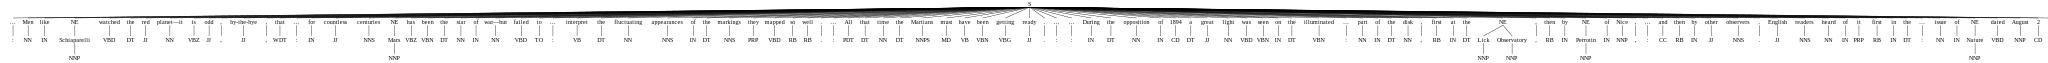

In [76]:
tree, ne_set = extract_ne(quote)
print(ne_set)
tree